In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [2]:
import scipy.stats as stats

In [3]:
root="data/data"
files:list[str] = os.listdir(root)
data={}
for fp in files:
    if fp.endswith("2010s.mat"):
        with h5py.File(os.path.join(root,fp),"r") as f:
            for key in f.keys():
                print(key,f[key].shape)
                data[key]=np.asarray(f[key][0])
for fp in files:
    if fp.endswith("2000s.mat"):
        with h5py.File(os.path.join(root,fp),"r") as f:
            try:
                for key in f.keys():
                    print(key,f[key].shape)
                    data[key]=np.concatenate(data[key],np.asarray(f[key][0]))
            except:
                print(key)

ACE_IMF_Bx (1, 5258880)
ACE_IMF_By (1, 5258880)
ACE_IMF_Bz (1, 5258880)
ACE_Psw (1, 5258880)
ACE_Vsw (1, 5258880)
OMNI_AE (1, 5258880)
OMNI_ASYMH (1, 5258880)
OMNI_PC (1, 5258880)
OMNI_SYMH (1, 5258880)
ACE_IMF_Bx (1, 5260320)
ACE_IMF_Bx
ACE_Psw (1, 5260320)
ACE_Psw
OMNI_AE (1, 5260320)
OMNI_AE


In [5]:
data['ACE_IMF_Bx']=np.concatenate(data['ACE_IMF_Bx'],np.asarray([12,3]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [3]:


def comprehensive_statistical_analysis(data, bins=50, figsize=(12, 8)):
    """
    对numpy数组进行全面的统计性质分析并绘制直方图
    
    Parameters:
    -----------
    data : numpy.ndarray
        输入数据数组
    bins : int
        直方图的箱数
    figsize : tuple
        图形大小
    """
    
    # 数据预处理：展平数组
    flat_data = data.flatten()
    num_nan = np.isnan(flat_data).sum()
    n_total = len(flat_data)
    
    # 计算基本统计量
    mean_val = np.nanmean(flat_data)
    median_val = np.nanmedian(flat_data)
    std_val = np.nanstd(flat_data)
    min_val = np.nanmin(flat_data)
    max_val = np.nanmax(flat_data)
    range_val = max_val - min_val
    
    # 计算MAD (Median Absolute Deviation)
    mad_val = np.nanmedian(np.abs(flat_data - median_val))
    
    # 计算分位数
    q1 = np.nanpercentile(flat_data, 25)
    q3 = np.nanpercentile(flat_data, 75)
    iqr = q3 - q1

    
    # 计算异常值界限 (基于MAD)
    lower_bound = median_val - 10 * mad_val
    upper_bound = median_val + 10 * mad_val
    
    # 裁剪数据到median ± 10*MAD范围
    clipped_data = np.clip(flat_data, lower_bound, upper_bound)
    n_clipped = len(clipped_data)
    
    # 计算裁剪后数据的统计量
    clipped_mean = np.nanmean(clipped_data)
    clipped_std = np.nanstd(clipped_data)
    
    # 创建图形
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # 子图1: 原始数据直方图
    ax1.hist(flat_data, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.4f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.4f}')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Original Data Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 子图2: 裁剪后数据直方图
    ax2.hist(clipped_data, bins=bins, alpha=0.7, color='orange', edgecolor='black')
    ax2.axvline(clipped_mean, color='red', linestyle='--', linewidth=2, label=f'Clipped Mean: {clipped_mean:.4f}')
    ax2.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.4f}')
    ax2.axvline(lower_bound, color='gray', linestyle=':', linewidth=1, label=f'Lower bound: {lower_bound:.4f}')
    ax2.axvline(upper_bound, color='gray', linestyle=':', linewidth=1, label=f'Upper bound: {upper_bound:.4f}')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Clipped Data Distribution\n(median ± 10*MAD)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 子图3: 箱线图比较
    boxplot_data = [flat_data, clipped_data]
    ax3.boxplot(boxplot_data, labels=['Original', 'Clipped'])
    ax3.set_ylabel('Value')
    ax3.set_title('Boxplot Comparison')
    ax3.grid(True, alpha=0.3)
    
    # 子图4: Q-Q图 (检查正态性)
    stats.probplot(clipped_data, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot (Clipped Data)')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 打印统计摘要
    
    print(f"\nBASIC STATISTICS:")
    print(f"Data shape: {data.shape}")
    print(f"Total samples: {n_total:,}")
    print(f"NaN Num:{num_nan:,}")
    print(f"Mean: {mean_val:.6f}")
    print(f"Median: {median_val:.6f}")
    print(f"Standard deviation: {std_val:.6f}")
    print(f"Minimum: {min_val:.6f}")
    print(f"Maximum: {max_val:.6f}")
    print(f"Range: {range_val:.6f}")
    
    print(f"\nROBUST STATISTICS:")
    print(f"MAD (Median Absolute Deviation): {mad_val:.6f}")
    print(f"Q1 (25th percentile): {q1:.6f}")
    print(f"Q3 (75th percentile): {q3:.6f}")
    print(f"IQR (Interquartile Range): {iqr:.6f}")
    
    # print(f"\nCLIPPING INFORMATION:")
    # print(f"Lower bound (median - 10*MAD): {lower_bound:.6f}")
    # print(f"Upper bound (median + 10*MAD): {upper_bound:.6f}")
    # print(f"Samples after clipping: {n_clipped:,}")
    # print(f"Percentage kept: {(n_clipped/n_total*100):.2f}%")
    
    # print(f"\nCLIPPED DATA STATISTICS:")
    # print(f"Clipped mean: {clipped_mean:.6f}")
    # print(f"Clipped standard deviation: {clipped_std:.6f}")
    
    # 返回统计结果字典
    results = {
        'original_data': flat_data,
        'clipped_data': clipped_data,
        'basic_stats': {
            'mean': mean_val,
            'median': median_val,
            'std': std_val,
            'min': min_val,
            'max': max_val,
            'range': range_val
        },
        'robust_stats': {
            'mad': mad_val,
            'q1': q1,
            'q3': q3,
            'iqr': iqr
        },
        'clipping_info': {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'n_original': n_total,
            'n_clipped': n_clipped
        }
    }
    
    return results

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sl1p(x):
    return np.log1p(np.abs(x))*np.sign(x)

['ACE_IMF_Bx', 'ACE_IMF_By', 'ACE_IMF_Bz']
ACE_IMF_Bx: shape=(1, 5260320), dtype=float32


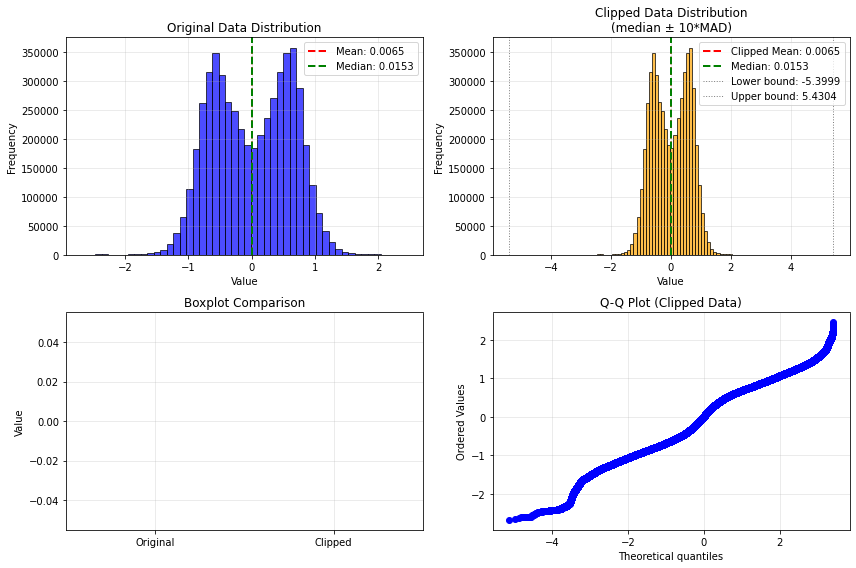


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,687
Mean: 0.006511
Median: 0.015253
Standard deviation: 0.620023
Minimum: -2.677306
Maximum: 2.454654
Range: 5.131960

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.541516
Q1 (25th percentile): -0.535456
Q3 (75th percentile): 0.547689
IQR (Interquartile Range): 1.083145


In [24]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"
fp="ACE_IMF_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "ACE_IMF_Bx":
            data = f[key][:]
            data = sl1p(data/3.92)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['ACE_IMF_Bx', 'ACE_IMF_By', 'ACE_IMF_Bz']
ACE_IMF_By: shape=(1, 5260320), dtype=float32


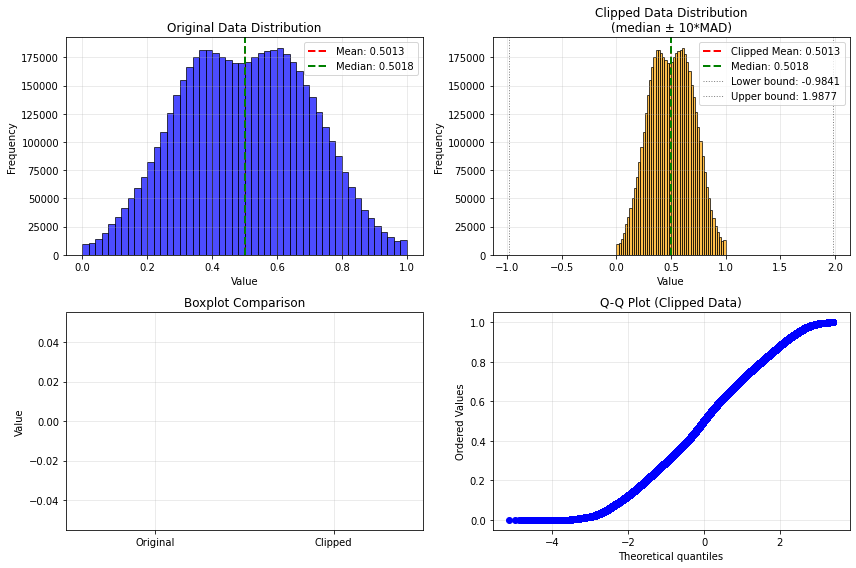


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,687
Mean: 0.501297
Median: 0.501764
Standard deviation: 0.197706
Minimum: 0.000002
Maximum: 0.999998
Range: 0.999996

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.148590
Q1 (25th percentile): 0.352152
Q3 (75th percentile): 0.649292
IQR (Interquartile Range): 0.297140

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -0.984132
Upper bound (median + 10*MAD): 1.987659
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 0.501297
Clipped standard deviation: 0.197706


In [ ]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"
fp="ACE_IMF_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "ACE_IMF_By":
            data = f[key][:]
            data = sigmoid(data/4.3)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['ACE_IMF_Bx', 'ACE_IMF_By', 'ACE_IMF_Bz']
ACE_IMF_Bz: shape=(1, 5260320), dtype=float32


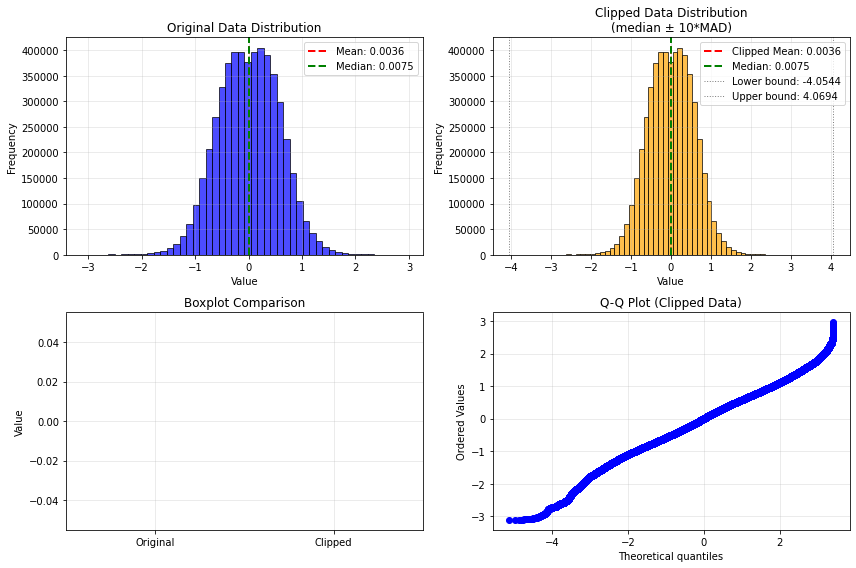


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,687
Mean: 0.003631
Median: 0.007486
Standard deviation: 0.570505
Minimum: -3.109406
Maximum: 2.958848
Range: 6.068254

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.406188
Q1 (25th percentile): -0.401587
Q3 (75th percentile): 0.410854
IQR (Interquartile Range): 0.812441


In [21]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

fp="ACE_IMF_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "ACE_IMF_Bz":
            data = f[key][:]
            data = np.log1p(np.abs(data/3.66))*np.sign(data)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['ACE_Psw', 'ACE_Vsw']
ACE_Psw: shape=(1, 5260320), dtype=float32


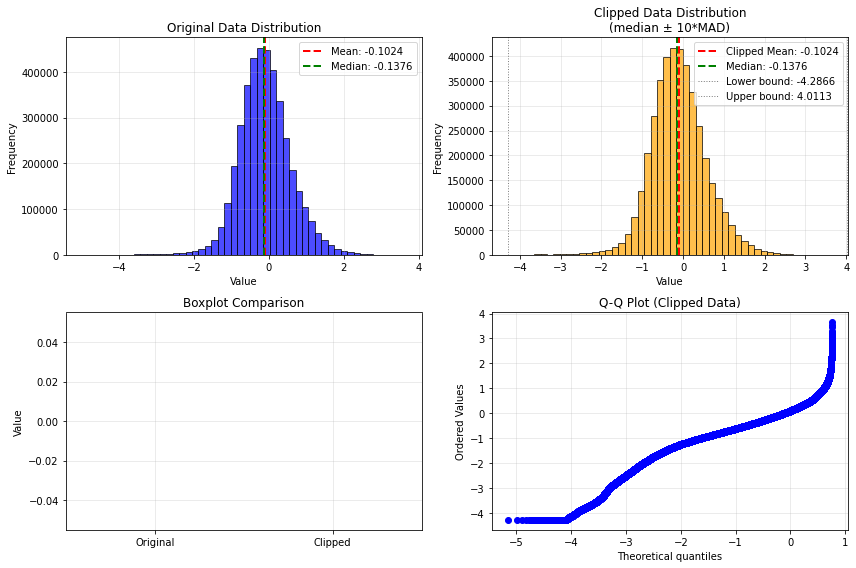


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,187,689
Mean: -0.102395
Median: -0.137631
Standard deviation: 0.669275
Minimum: -4.984968
Maximum: 3.644040
Range: 8.629007

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.414892
Q1 (25th percentile): -0.538779
Q3 (75th percentile): 0.293322
IQR (Interquartile Range): 0.832102


In [29]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

fp="ACE_SW_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "ACE_Psw":
            data = f[key][:]
            data = np.log(data/5)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['ACE_Psw', 'ACE_Vsw']
ACE_Vsw: shape=(1, 5260320), dtype=float32


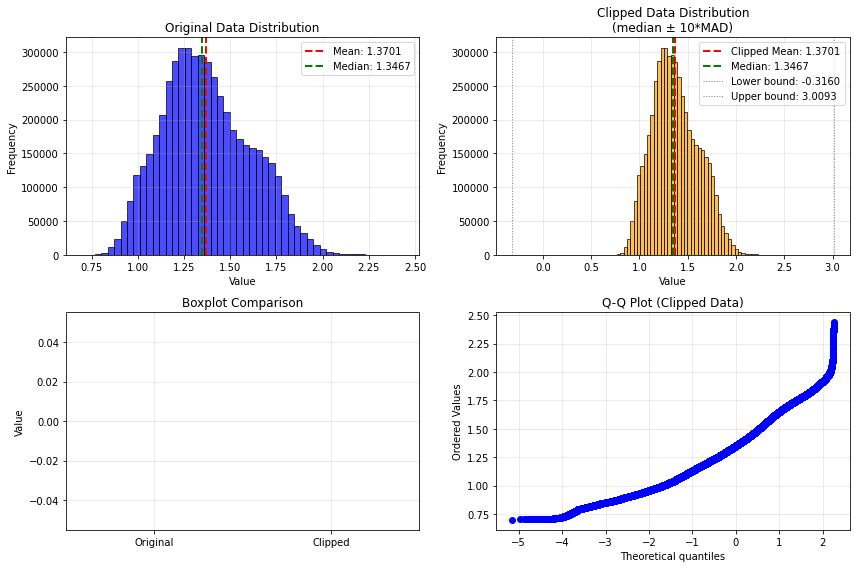


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:64,612
Mean: 1.370120
Median: 1.346654
Standard deviation: 0.238144
Minimum: 0.697139
Maximum: 2.437362
Range: 1.740223

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.166266
Q1 (25th percentile): 1.195794
Q3 (75th percentile): 1.537317
IQR (Interquartile Range): 0.341523


In [31]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

fp="ACE_SW_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "ACE_Vsw":
            data = f[key][:]
            data = np.log(data/110)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['OMNI_AE', 'OMNI_ASYMH', 'OMNI_PC', 'OMNI_SYMH']
OMNI_AE: shape=(1, 5260320), dtype=float32


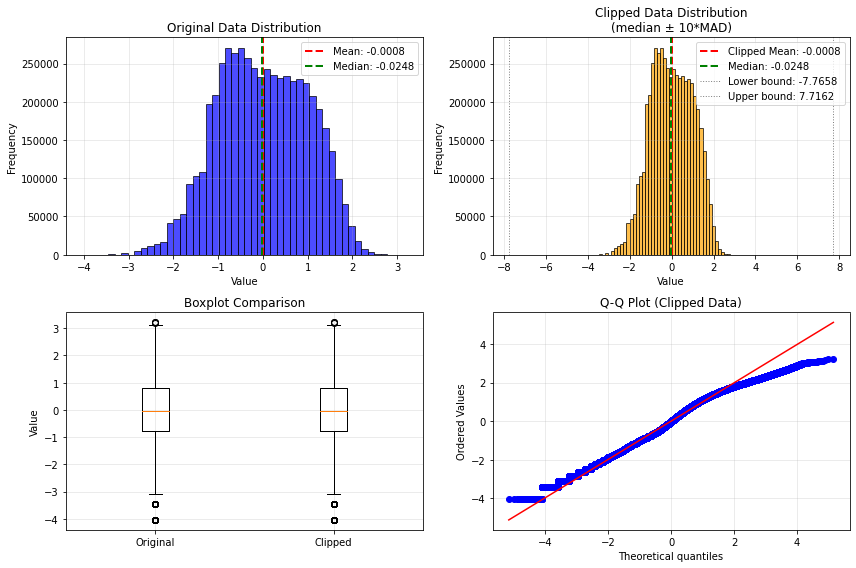


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:0
Mean: -0.000836
Median: -0.024789
Standard deviation: 0.999729
Minimum: -4.037937
Maximum: 3.215049
Range: 7.252986

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.774096
Q1 (25th percentile): -0.767328
Q3 (75th percentile): 0.794087
IQR (Interquartile Range): 1.561416


In [6]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

fp="OMNI_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "OMNI_AE":
            data = f[key][:]
            data[data<0.9]=np.nan
            data = (np.log(data/220)+0.75)/1.15
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['OMNI_AE', 'OMNI_ASYMH', 'OMNI_PC', 'OMNI_SYMH']
OMNI_ASYMH: shape=(1, 5260320), dtype=float32


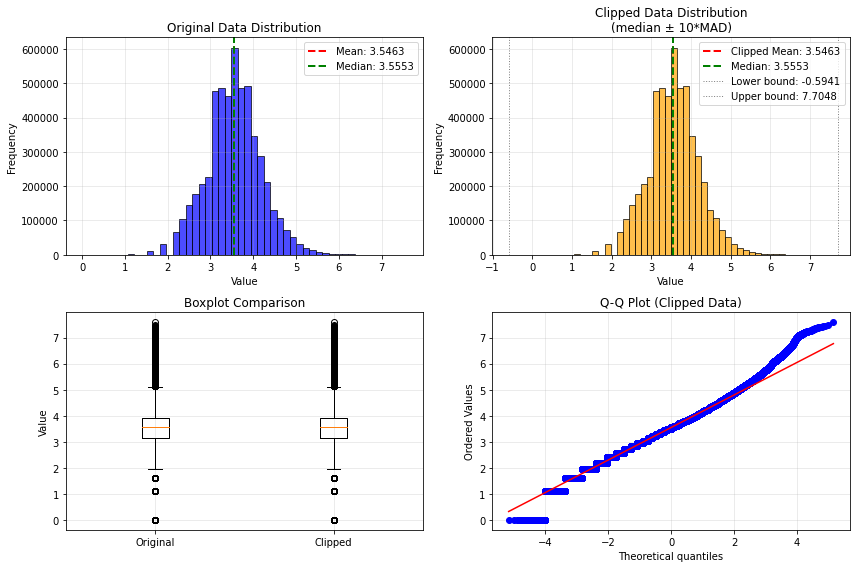


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:0
Mean: 3.546285
Median: 3.555348
Standard deviation: 0.627532
Minimum: 0.000000
Maximum: 7.585281
Range: 7.585281

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.414944
Q1 (25th percentile): 3.135494
Q3 (75th percentile): 3.931826
IQR (Interquartile Range): 0.796331


In [36]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

fp="OMNI_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "OMNI_ASYMH":
            data = f[key][:]
            data = np.log1p(data*2)#/17.4)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['OMNI_AE', 'OMNI_ASYMH', 'OMNI_PC', 'OMNI_SYMH']
OMNI_PC: shape=(1, 5260320), dtype=float32


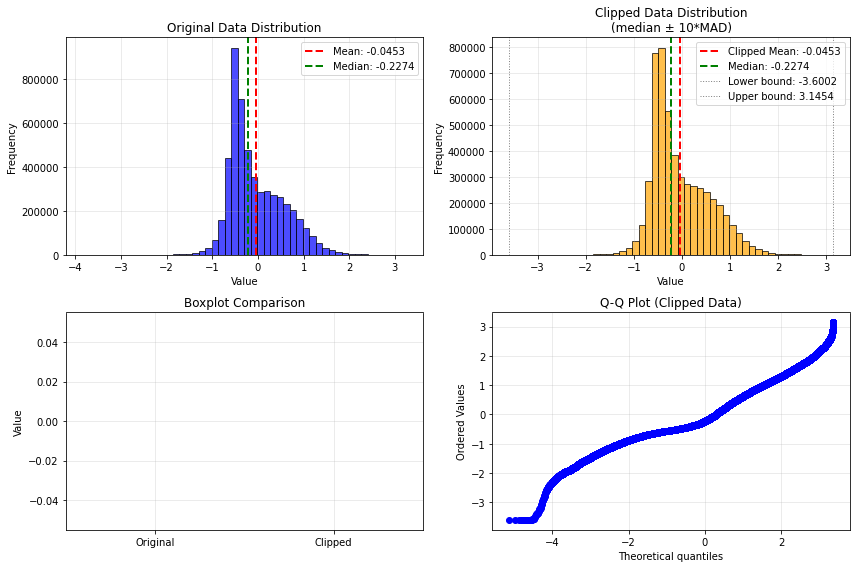


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,986
Mean: -0.045311
Median: -0.227390
Standard deviation: 0.590911
Minimum: -3.854965
Maximum: 3.261636
Range: 7.116601

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.337279
Q1 (25th percentile): -0.489319
Q3 (75th percentile): 0.354545
IQR (Interquartile Range): 0.843864


In [38]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

fp="OMNI_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "OMNI_PC":
            data = f[key][:]
            data[data>100]=np.nan
            data = sl1p((data-1)/1.41)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['OMNI_AE', 'OMNI_ASYMH', 'OMNI_PC', 'OMNI_SYMH']
OMNI_SYMH: shape=(1, 5260320), dtype=float32


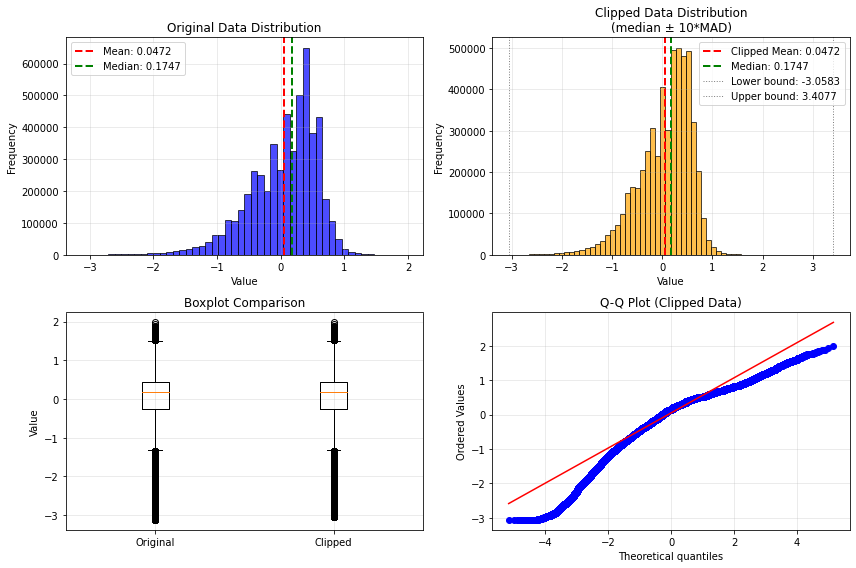


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:0
Mean: 0.047174
Median: 0.174717
Standard deviation: 0.525351
Minimum: -3.121163
Maximum: 1.979119
Range: 5.100282

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.323300
Q1 (25th percentile): -0.269333
Q3 (75th percentile): 0.441183
IQR (Interquartile Range): 0.710516


In [40]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

fp="OMNI_2000s.mat"
with h5py.File(os.path.join(fpa,fp), 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        if key == "OMNI_SYMH":
            data = f[key][:]
            data = sl1p((data+13.2)/22)
            print("="*32)
            print(f"{key}: shape={data.shape}, dtype={data.dtype}")
            _ = comprehensive_statistical_analysis(data)

['ACE_IMF_Bx', 'ACE_IMF_By', 'ACE_IMF_Bz']
ACE_IMF_Bx: shape=(1, 5260320), dtype=float32


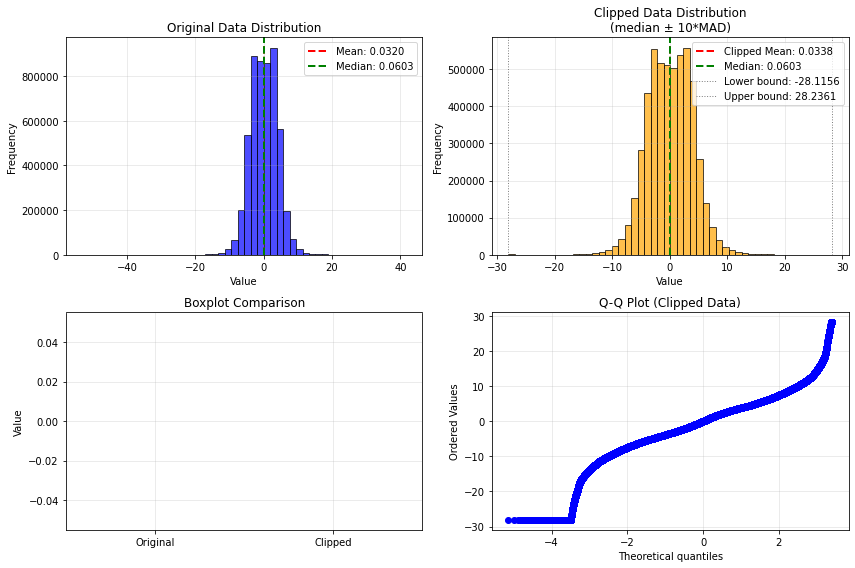


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,687
Mean: 0.031996
Median: 0.060250
Standard deviation: 3.921661
Minimum: -53.099751
Maximum: 41.718250
Range: 94.818001

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 2.817583
Q1 (25th percentile): -2.776250
Q3 (75th percentile): 2.858667
IQR (Interquartile Range): 5.634917

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -28.115583
Upper bound (median + 10*MAD): 28.236083
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 0.033831
Clipped standard deviation: 3.903377
ACE_IMF_By: shape=(1, 5260320), dtype=float32


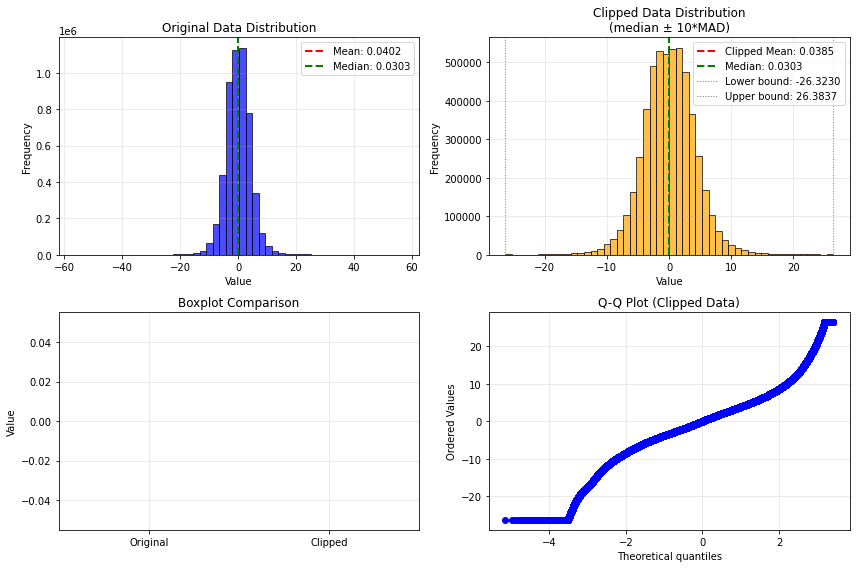


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,687
Mean: 0.040239
Median: 0.030333
Standard deviation: 4.302498
Minimum: -56.182751
Maximum: 56.895248
Range: 113.078003

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 2.635333
Q1 (25th percentile): -2.621250
Q3 (75th percentile): 2.648500
IQR (Interquartile Range): 5.269750

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -26.323000
Upper bound (median + 10*MAD): 26.383666
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 0.038453
Clipped standard deviation: 4.269940
ACE_IMF_Bz: shape=(1, 5260320), dtype=float32


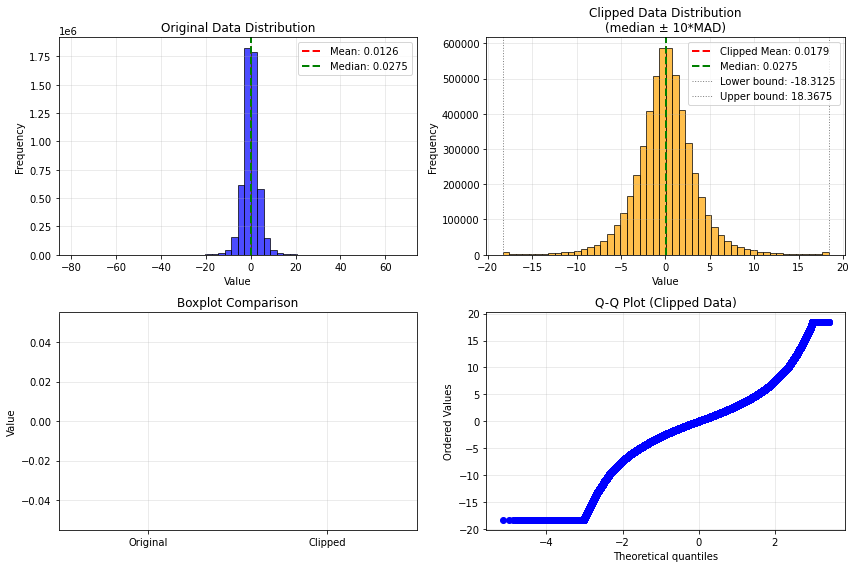


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,687
Mean: 0.012599
Median: 0.027500
Standard deviation: 3.665300
Minimum: -78.352249
Maximum: 66.889252
Range: 145.241501

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 1.834000
Q1 (25th percentile): -1.808750
Q3 (75th percentile): 1.859667
IQR (Interquartile Range): 3.668417

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -18.312500
Upper bound (median + 10*MAD): 18.367500
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 0.017875
Clipped standard deviation: 3.530824
['ACE_Psw', 'ACE_Vsw']
ACE_Psw: shape=(1, 5260320), dtype=float32


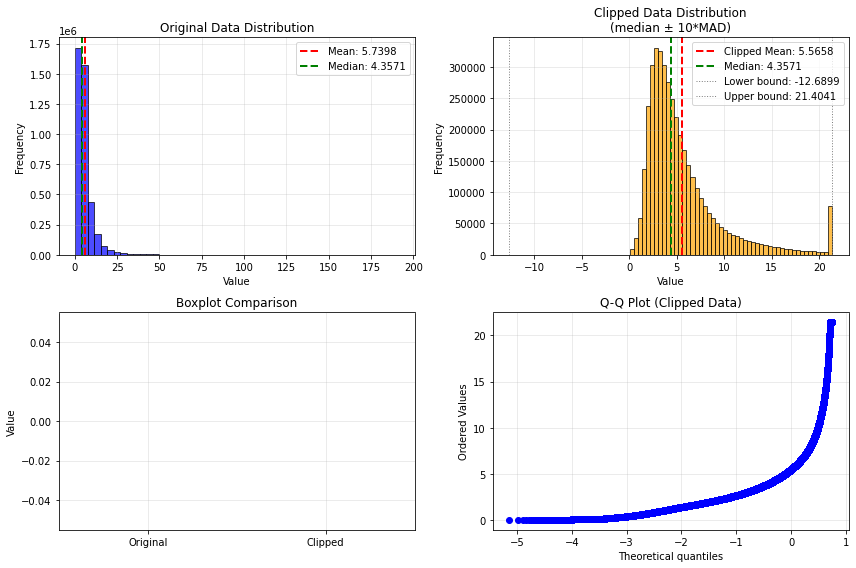


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:1,187,689
Mean: 5.739844
Median: 4.357100
Standard deviation: 5.085210
Minimum: 0.034200
Maximum: 191.230194
Range: 191.195999

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 1.704700
Q1 (25th percentile): 2.917300
Q3 (75th percentile): 6.704375
IQR (Interquartile Range): 3.787075

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -12.689900
Upper bound (median + 10*MAD): 21.404100
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 5.565774
Clipped standard deviation: 4.076634
ACE_Vsw: shape=(1, 5260320), dtype=float32


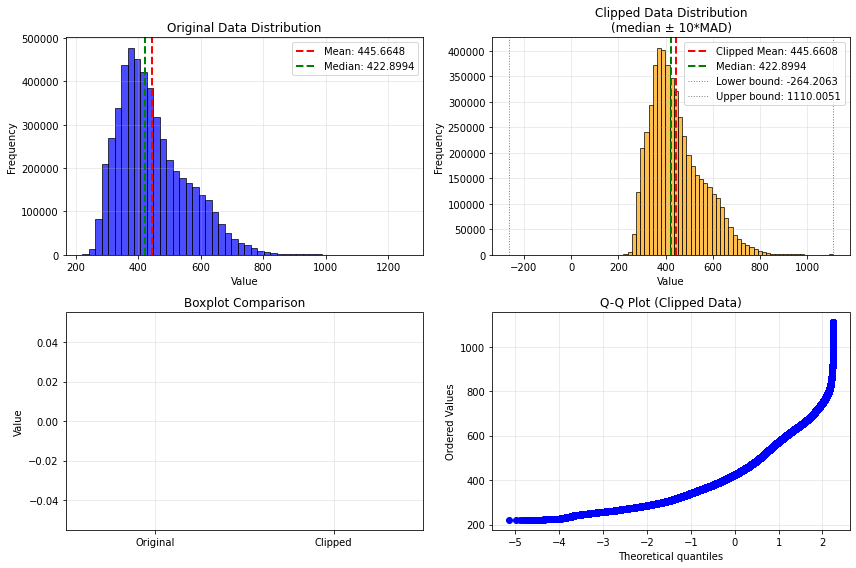


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:64,612
Mean: 445.664795
Median: 422.899414
Standard deviation: 110.583534
Minimum: 220.880005
Maximum: 1258.709961
Range: 1037.829956

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 68.710571
Q1 (25th percentile): 363.679993
Q3 (75th percentile): 511.730011
IQR (Interquartile Range): 148.050018

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -264.206299
Upper bound (median + 10*MAD): 1110.005127
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 445.660797
Clipped standard deviation: 110.558350
['OMNI_AE', 'OMNI_ASYMH', 'OMNI_PC', 'OMNI_SYMH']
OMNI_AE: shape=(1, 5260320), dtype=float32


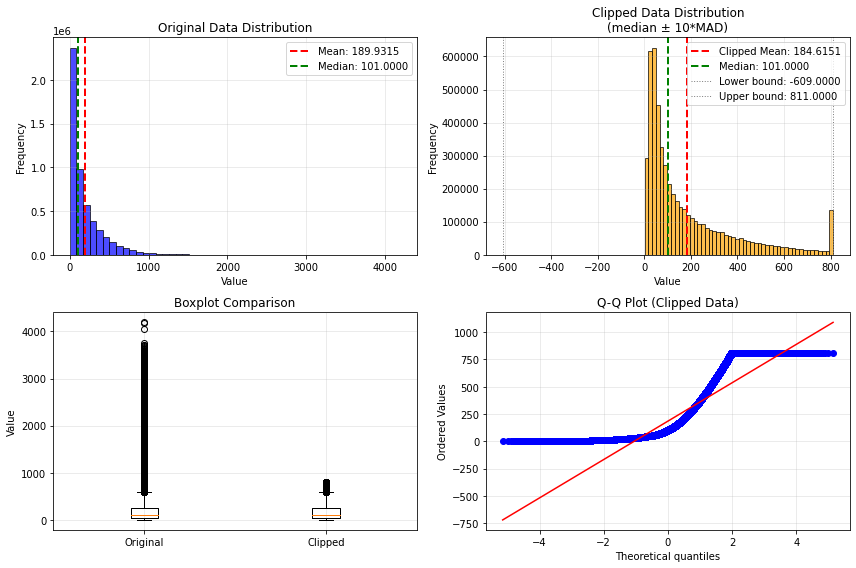


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:0
Mean: 189.931488
Median: 101.000000
Standard deviation: 220.208405
Minimum: 1.000000
Maximum: 4192.000000
Range: 4191.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 71.000000
Q1 (25th percentile): 43.000000
Q3 (75th percentile): 259.000000
IQR (Interquartile Range): 216.000000

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -609.000000
Upper bound (median + 10*MAD): 811.000000
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 184.615112
Clipped standard deviation: 197.867798
OMNI_ASYMH: shape=(1, 5260320), dtype=float32


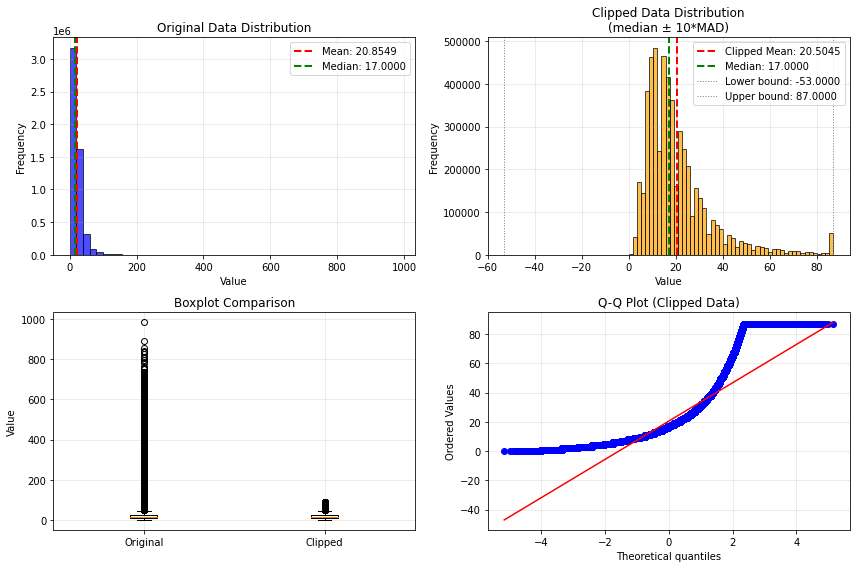


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:0
Mean: 20.854925
Median: 17.000000
Standard deviation: 17.389055
Minimum: 0.000000
Maximum: 984.000000
Range: 984.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 7.000000
Q1 (25th percentile): 11.000000
Q3 (75th percentile): 25.000000
IQR (Interquartile Range): 14.000000

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -53.000000
Upper bound (median + 10*MAD): 87.000000
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 20.504478
Clipped standard deviation: 14.557063
OMNI_PC: shape=(1, 5260320), dtype=float32


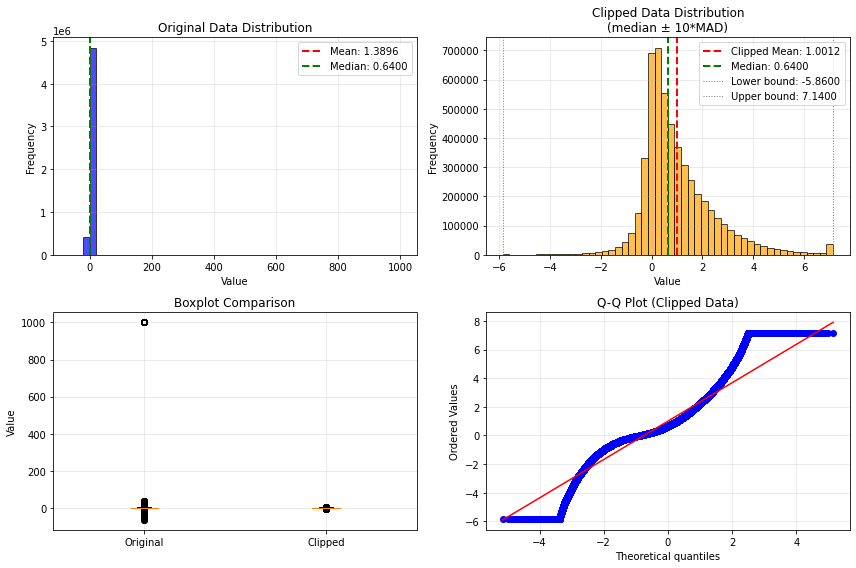


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:0
Mean: 1.389605
Median: 0.640000
Standard deviation: 19.465935
Minimum: -64.180000
Maximum: 999.989990
Range: 1064.170044

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.650000
Q1 (25th percentile): 0.110000
Q3 (75th percentile): 1.610000
IQR (Interquartile Range): 1.500000

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -5.860000
Upper bound (median + 10*MAD): 7.140000
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 1.001185
Clipped standard deviation: 1.416175
OMNI_SYMH: shape=(1, 5260320), dtype=float32


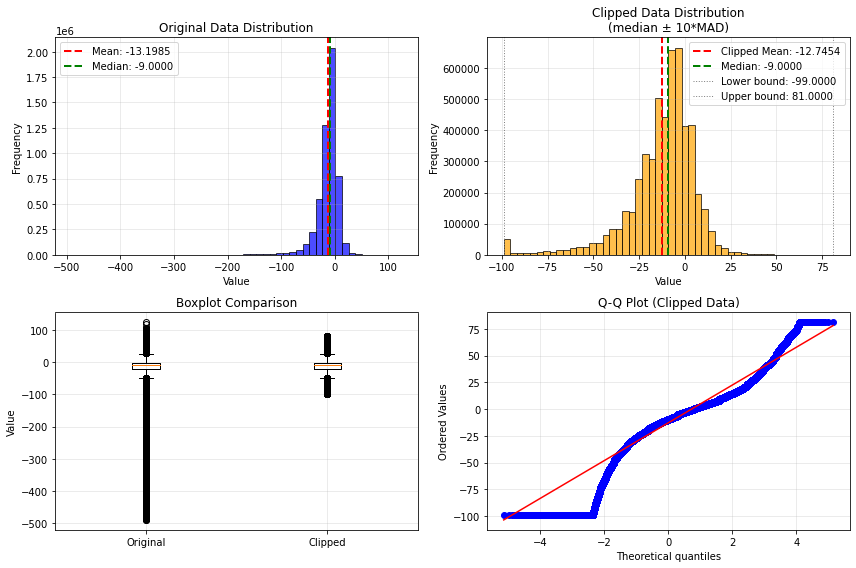


BASIC STATISTICS:
Data shape: (1, 5260320)
Total samples: 5,260,320
NaN Num:0
Mean: -13.198450
Median: -9.000000
Standard deviation: 22.039221
Minimum: -490.000000
Maximum: 124.000000
Range: 614.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 9.000000
Q1 (25th percentile): -20.000000
Q3 (75th percentile): -1.000000
IQR (Interquartile Range): 19.000000

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -99.000000
Upper bound (median + 10*MAD): 81.000000
Samples after clipping: 5,260,320
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: -12.745417
Clipped standard deviation: 18.784040


In [4]:
fpa = r"D:\hw2025\space weather\spaceWeatherLab\tmp\src\data\data"

files = os.listdir(fpa)
for fp in files:
    if "2000s" in fp:
        with h5py.File(os.path.join(fpa,fp), 'r') as f:
            # 查看文件中的所有变量
            print(list(f.keys()))
            for key in f.keys():
                data = f[key][:]
                print("="*32)
                print(f"{key}: shape={data.shape}, dtype={data.dtype}")
                _ = comprehensive_statistical_analysis(data)